### Imports and installations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

from zipfile import ZipFile
import os.path
from os import path

import tomotopy as tp
import glob
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame, Markdown, display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# if you need to install tomotopy or seaborn uncomment the relevant lines below
# run this cell
# re-run the cell above

!pip install tomotopy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 37.9 MB/s eta 0:00:00


In [ ]:
# note if you get an error with stopwords below then uncomment the following lines and re-run this cell
import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The following cell contain a preprocessing function will use for all our topic models.

In [ ]:
def preprocess_data(doc_set, extra_stopwords={}):
    # adapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

    # replace all newlines or multiple sequences of spaces with a standard space
    doc_set = [re.sub(r'\s+', ' ', doc_set)]

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = set(stopwords.words('english'))

    # add any extra stopwords
    if (len(extra_stopwords) > 0):
        en_stop = en_stop.union(extra_stopwords)

    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # add tokens to list
        texts.append(stopped_tokens)

    return texts

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DIGI405 /corpus/AT_20_22/')

In [ ]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Make sure to download the required NLTK resources first
nltk.download('punkt')

# Load your text data
with open("/content/drive/MyDrive/DIGI405 /corpus/AT_20_22/combined_file_22.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text data
#tokens = word_tokenize(text_data)
#text_obj = Text(tokens)

# # Find and print concordance for "tourism" and "tourist"
# print("Concordance for 'tourism':")
# text_obj.concordance("tourism", lines=25)

# print("\nConcordance for 'tourist':")
# text_obj.concordance("tourist", lines=25)


# print("\nConcordance for 'australia':")
# text_obj.concordance("australian", lines=25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
doc_clean = preprocess_data(text_data, {})


In [ ]:
doc_clean

[['good',
  'news',
  'cruises',
  'despite',
  'virus',
  'cruise',
  'industry',
  'says',
  'weathering',
  'coronavirus',
  'storm',
  'passenger',
  'numbers',
  'hold',
  'strong',
  'cruise',
  'ships',
  'make',
  'extra',
  'calls',
  'new',
  'zealand',
  'ports',
  'although',
  'wider',
  'tourism',
  'industry',
  'throttled',
  'travel',
  'restrictions',
  'debbie',
  'summers',
  'chairwoman',
  'new',
  'zealand',
  'cruise',
  'association',
  'told',
  'businessdesk',
  'liner',
  'visits',
  'steady',
  'cruise',
  'good',
  'news',
  'story',
  'new',
  'zealand',
  'tourism',
  'right',
  'said',
  'could',
  'stand',
  'gain',
  'business',
  'well',
  'small',
  'businesses',
  'really',
  'going',
  'need',
  'winter',
  'season',
  'tourists',
  'take',
  'cruises',
  'tend',
  'australasia',
  'united',
  'states',
  'areas',
  'less',
  'affected',
  'virus',
  'outbreak',
  'asia',
  'makes',
  '7',
  'global',
  'cruising',
  'market',
  'basically',
  'em

In [ ]:
# import string
# from nltk.tokenize import WordPunctTokenizer


# # Convert text_data to lowercase
# text_data_lower = text_data.lower()

# # Remove punctuation from the lowercase text
# translator = str.maketrans('', '', string.punctuation + "’\“\”")
# text_data_no_punct = text_data_lower.translate(translator)

# # Tokenize the text without punctuation into words
# tokens = WordPunctTokenizer().tokenize(text_data_no_punct)

# # Print the tokens
# print(tokens)

['‘', 'good', 'news', 'for', 'cruises', 'despite', 'virus', 'the', 'cruise', 'industry', 'says', 'it', 'is', 'weathering', 'the', 'coronavirus', 'storm', 'as', 'passenger', 'numbers', 'hold', 'strong', 'and', 'cruise', 'ships', 'make', 'extra', 'calls', 'to', 'new', 'zealand', 'ports', 'although', 'the', 'wider', 'tourism', 'industry', 'has', 'been', 'throttled', 'by', 'travel', 'restrictions', 'debbie', 'summers', 'chairwoman', 'of', 'the', 'new', 'zealand', 'cruise', 'association', 'told', 'businessdesk', 'that', 'liner', 'visits', 'were', 'steady', '‘‘', 'cruise', 'is', 'a', 'good', 'news', 'story', 'for', 'new', 'zealand', 'tourism', 'right', 'now', 'she', 'said', '‘‘', 'we', 'could', 'stand', 'to', 'gain', 'some', 'more', 'business', 'as', 'well', 'which', 'small', 'businesses', 'are', 'really', 'going', 'to', 'need', 'over', 'the', 'winter', 'season', 'tourists', 'who', 'take', 'cruises', 'tend', 'to', 'be', 'from', 'australasia', 'or', 'the', 'united', 'states', 'areas', 'less',

In [ ]:
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# tokens = [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Run this cell to train the model and display the results
# (you shouldn't need to change anything in this cell)
# Adapted from https://bab2min.github.io/tomotopy/v0.12.2/en/

# Intialize the model
model = tp.LDAModel(k=4) # here we set the number of topics

num_topic_words = 15 # we'll display 10 words to represent each topic

# Add each document to the model
for text in doc_clean:
    model.add_doc(text)

print("Topic Model Training...\n")

# train the model
# we have specified 200 (10*20) iterations of Gibbs sampling total
# the loop reports Log Liklihood/word every 10 iterations. This is a measure of model fit to the data (higher is better)
for i in range(0, 100, 10):
    model.train(iter=20)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# print topic words
for k in range(model.k):
    print('\nTop 15 words of topic #{}\n'.format(k))
    print(model.get_topic_words(k, top_n=num_topic_words)) # here we request 10 words to represent each topic

# get info about the model we just trained
print("\nModel Summary\n")
model.summary()

Topic Model Training...

Iteration: 0	Log-likelihood: -8.38454821315019
Iteration: 10	Log-likelihood: -8.23411376612527
Iteration: 20	Log-likelihood: -8.160925070839639
Iteration: 30	Log-likelihood: -8.119984191180757
Iteration: 40	Log-likelihood: -8.101305525681987
Iteration: 50	Log-likelihood: -8.09060114071532
Iteration: 60	Log-likelihood: -8.074244501916517
Iteration: 70	Log-likelihood: -8.06925324184406
Iteration: 80	Log-likelihood: -8.053802258159804
Iteration: 90	Log-likelihood: -8.045180835181881

Top 15 words of topic #0

[('tourism', 0.04950674623250961), ('per', 0.019524050876498222), ('international', 0.01647348701953888), ('australia', 0.01412019319832325), ('year', 0.013335762545466423), ('19', 0.01316144410520792), ('visitors', 0.012725649401545525), ('time', 0.012551331892609596), ('business', 0.012464172206819057), ('sector', 0.010459515266120434), ('queenstown', 0.010415934957563877), ('one', 0.01028519682586193), ('get', 0.009762243367731571), ('back', 0.009675083681

In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

topics = []
topic_individual_words = []
for topic_number in range(0, model.k):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())

In [ ]:
topics

['tourism per international australia year 19 visitors time business sector queenstown one get back also',
 'said new zealand covid cent hotel government people hotels country going months still support years',
 'would could many tourists need year rotorua numbers much borders see australian executive lockdown business',
 'said travel industry businesses domestic says bubble auckland like accommodation open around market border us']

Optional: If you're interested in the code, you can uncomment lines and run the cell below to see what the variables in the cell above contain.

In [ ]:
topic_distributions # topic proportions in documents as a list

#topics # topic words as a string

#topic_individual_words # topic words as a list

[[0.2842474, 0.2523482, 0.21859708, 0.2448073]]

Next are a couple of functions to format our output...

In [ ]:
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### Topic {topic_index}\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        bolded = []
        for word in doc[1].split():
            if word.lower().strip(')(.?!,') in topic_words.split():
                bolded.append('**{}**'.format(word))
            else:
                bolded.append(word)

        make_md(f'  \n**Topic Probability**: {probability}  \n**Source**: {doc[0]}  \n**Document**: {" ".join(bolded)} \n\n')

    return

In [ ]:
for topic_num in range(model.k):
    get_top_docs(doc_clean, topic_distributions, topic_index=topic_num, n=5)

### Topic 0

tourism per international australia year 19 visitors time business sector queenstown one get back also

---

  
**Topic Probability**: 0.28424739837646484  
**Source**: good  
**Document**: news 



### Topic 1

said new zealand covid cent hotel government people hotels country going months still support years

---

  
**Topic Probability**: 0.2523482143878937  
**Source**: good  
**Document**: news 



### Topic 2

would could many tourists need year rotorua numbers much borders see australian executive lockdown business

---

  
**Topic Probability**: 0.21859708428382874  
**Source**: good  
**Document**: news 



### Topic 3

said travel industry businesses domestic says bubble auckland like accommodation open around market border us

---

  
**Topic Probability**: 0.24480730295181274  
**Source**: good  
**Document**: news 



In [ ]:
# here we'll construct a document-topic matrix
# rows are documents, columns are topics
# values are frequency of words assigned to this topic in this document

import numpy as np
from collections import Counter

doc_topic_df = pd.DataFrame(0, index=np.arange(len(model.docs)), columns=np.arange(model.k))

for row, doc in enumerate(model.docs):
    doc_topic_counts = Counter(doc.topics)
    for k, v in doc_topic_counts.items():
        doc_topic_df.iloc[row, k] = v

doc_topic_df.columns = ['Topic ' + str(t) for t in range(model.k)]

doc_topic_df

,Topic 0,Topic 1,Topic 2,Topic 3
0,22882,20314,17597,19707


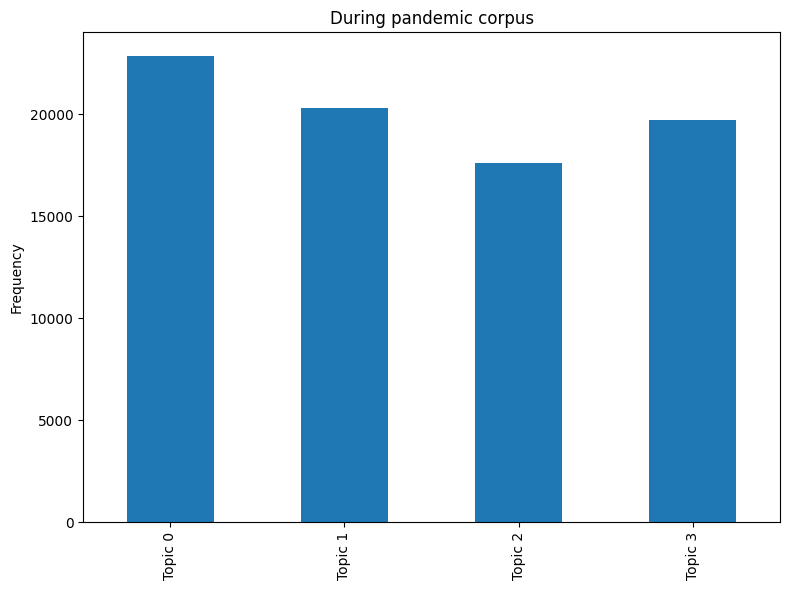

In [ ]:
# Transpose the dataframe, then plot a bar chart per document
# Don't use this with large numbers of documents!

h = len(model.docs)

axes = doc_topic_df.T.plot.bar(subplots=True,
                                figsize=(8,6),
                                title=['During pandemic corpus'],
                                legend=False,
                                sharex=False,
                                sharey=True,
                                ylabel='Frequency')

fig = axes[0].get_figure()
fig.tight_layout()

The code block below produces a heat map showing the density of topic-word distributions for each topic. The y-axis is the number of each word in the vocabulary used in the model. The columns are topics.

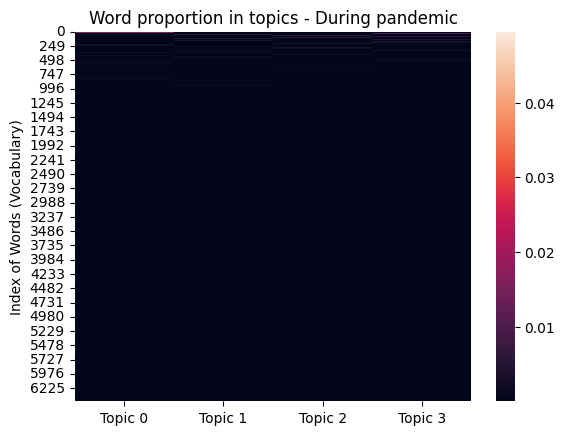

In [ ]:
example_number = 'During pandemic'
topic_dist_list = []

for t in range(model.k):
    topic_dist_list.append(model.get_topic_word_dist(t, normalize=True))

topic_dist_df = pd.DataFrame(topic_dist_list)

transformed = topic_dist_df.T
transformed.columns = ['Topic ' + str(t) for t in range(model.k)]
ax = sns.heatmap(transformed)

plt.title('Word proportion in topics - {}'.format(example_number), fontsize = 12)
plt.ylabel('Index of Words (Vocabulary)', fontsize = 10)

plt.show()

<div style="border:1px solid black;margin-top:1em;padding:0.5em;">
<strong>Task 3:</strong> Using the bar chart and heat maps, try some comparisons:
   <ul>
       <li>Example 2 (fewer documents) vs Example 3 (more documents), keeping the number of topics constant.</li>
       <li>Example 2, with 3 topics, then 6 topics.
       <li>Example 3, with 3 topics, then 6 topics.
    </ul>
    <p>Open the resulting images in a new tab to keep a copy, and make some notes about your findings.</p>  
</div>

### Further exercises

- Make your own tiny corpus with fewer than 10 documents. Explore how words are assigned to topics, and how topics are spread across documents. See if you can choose documents that have some overlapping topics for the algorithm to pick up.

### Sources

- https://en.wikipedia.org/wiki/Cat  
- https://en.wikipedia.org/wiki/Dog  
- https://cat-world.com/cats-as-pets/  
- https://www.goodhousekeeping.com/uk/news/a560588/10-reasons-why-dogs-are-the-best-pets/